<a href="https://colab.research.google.com/github/Veena9977/Practice2/blob/main/sentimentanalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import nltk
import re
nltk.download('punkt_tab')
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from gensim.models import Word2Vec

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [128]:
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import tensorflow as tf
from tensorflow.keras.layers import SimpleRNN, LSTM, Dense, Dropout, Embedding, BatchNormalization, GRU
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import pad_sequences
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence


In [ ]:
data = pd.read_csv('/content/tweets.csv')


In [ ]:
print(data.shape)

(7920, 3)


In [ ]:
#Display the dtype information
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7920 entries, 0 to 7919
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      7920 non-null   int64 
 1   label   7920 non-null   int64 
 2   tweet   7920 non-null   object
dtypes: int64(2), object(1)
memory usage: 185.8+ KB
None


In [ ]:
print(data['label'].value_counts())

label
0    5894
1    2026
Name: count, dtype: int64


In [ ]:
data.head()

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0,Finally a transparant silicon case ^^ Thanks t...
2,3,0,We love this! Would you go? #talk #makememorie...
3,4,0,I'm wired I know I'm George I was made that wa...
4,5,1,What amazing service! Apple won't even talk to...


In [ ]:
#Checking missing values
data.isna().sum()

,0
id,0
label,0
tweet,0


In [ ]:
#Checking null values
data.isnull().sum()

,0
id,0
label,0
tweet,0


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
print(nltk.data.find('tokenizers/punkt'))

/root/nltk_data/tokenizers/punkt


In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
from nltk.stem import WordNetLemmatizer

In [ ]:
lemmatizer = WordNetLemmatizer()

In [ ]:
stopwords = set(nltk.corpus.stopwords.words('english'))

In [ ]:
from nltk.stem import PorterStemmer
porter_stemmer = PorterStemmer()

In [ ]:
#Using the function removes urls,special characters,stop words etc....It preserves the hash tags.And also  convert text to lower
#case and tokenize text and apply stemming
def clean_reviews(text):
    # Remove URLs
    text = re.sub(r'http\S+', '', text)
    # Remove user mentions (@username)
    text = re.sub(r'@\S+', '', text)
    # Remove special characters except hashtags
    text = re.sub(r'[^A-Za-z#\s]', '', text)

    # Convert to lowercase
    text = text.lower()

    # Tokenize the text (split into words)
    tokens = word_tokenize(text)

    # Remove stopwords
    tokens = [word for word in tokens if word not in stopwords]

    # Apply stemming
    stemmed_tokens = [porter_stemmer.stem(word) for word in tokens]

    # Apply lemmatization
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in stemmed_tokens]

    # Join words back into a string
    cleaned_text = ' '.join(lemmatized_tokens)

    return cleaned_text

In [ ]:
data['cleaned_tweet'] = data['tweet'].apply(clean_reviews)

In [ ]:
#Display the old and new cleaned tweets
print(data[['tweet', 'cleaned_tweet']].head())

                                               tweet  \
0  #fingerprint #Pregnancy Test https://goo.gl/h1...   
1  Finally a transparant silicon case ^^ Thanks t...   
2  We love this! Would you go? #talk #makememorie...   
3  I'm wired I know I'm George I was made that wa...   
4  What amazing service! Apple won't even talk to...   

                                       cleaned_tweet  
0  # fingerprint # pregnanc test # android # app ...  
1  final transpar silicon case thank uncl # yay #...  
2  love would go # talk # makememori # unplug # r...  
3  im wire know im georg made way # iphon # cute ...  
4  amaz servic appl wont even talk question unles...  


In [ ]:
import re
import string
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from keras.optimizers import Adam



In [ ]:
# Display the first few rows of the DataFrame to check the updated column
print(data[['tweet', 'cleaned_tweet']].head())


                                               tweet  \
0  #fingerprint #Pregnancy Test https://goo.gl/h1...   
1  Finally a transparant silicon case ^^ Thanks t...   
2  We love this! Would you go? #talk #makememorie...   
3  I'm wired I know I'm George I was made that wa...   
4  What amazing service! Apple won't even talk to...   

                                       cleaned_tweet  
0  # fingerprint # pregnanc test # android # app ...  
1  final transpar silicon case thank uncl # yay #...  
2  love would go # talk # makememori # unplug # r...  
3  im wire know im georg made way # iphon # cute ...  
4  amaz servic appl wont even talk question unles...  


In [125]:
tokenized_corpus = [word_tokenize(tweet) for tweet in data['cleaned_tweet']]

Bag of Words

In [ ]:
vectorizer = CountVectorizer(max_features=5000)  # Limit the number of features (words)
X_bow = vectorizer.fit_transform(data['cleaned_tweet']).toarray()

In [ ]:
print(X_bow.shape)

(7920, 5000)


In [ ]:
# Initialize the CountVectorizer with n-grams (1, 2)
cv = CountVectorizer(ngram_range=(1, 2))

# Apply fit_transform to the cleaned tweets
X = cv.fit_transform(data['cleaned_tweet'])

# Get the labels (y)
y = data['label']


In [ ]:
data['label']

,label
0,0
1,0
2,0
3,0
4,1
...,...
7915,0
7916,0
7917,0
7918,0


In [ ]:
feature_names = cv.get_feature_names_out()
print("Feature Names (Unigrams):", feature_names[:20])

Feature Names (Unigrams): ['aa' 'aa american' 'aa appl' 'aa ax' 'aa kfn' 'aa magic' 'aaaahhhhhhh'
 'aaaahhhhhhh excit' 'aah' 'aah see' 'aalborg' 'aand' 'aand probabl'
 'aapl' 'aapl cross' 'aapl lawyer' 'aapl proprietari' 'aarhu'
 'aarhu danmarkpictwittercompgkyhbhi' 'aaron']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators = 100)
clf.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
#Display the accuracy
from sklearn import metrics
y_pred = clf.predict(X_test)
metrics.accuracy_score(y_test, y_pred)

0.8566919191919192

Word Embedding Model

In [ ]:
tokenizer = Tokenizer(num_words=5000)  # Limit to 5000 most frequent words
tokenizer.fit_on_texts(data['cleaned_tweet'])
X_sequences = tokenizer.texts_to_sequences(data['cleaned_tweet'])

In [ ]:
X_padded = pad_sequences(X_sequences, maxlen=100)

In [ ]:
y = data['label'].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_padded, y, test_size=0.20, random_state=42)

RNN MODEL

In [ ]:
rnn = Sequential()
rnn.add(Embedding(input_dim=len(tokenizer.word_index) + 1,  # Number of words in the tokenizer's vocabulary
                    output_dim=100,  # Vector size for each word
                    input_length=100))  # Le

rnn.add(SimpleRNN(128,activation='relu',return_sequences=True))

rnn.add(SimpleRNN(64,activation='relu',return_sequences=False))

rnn.add(Dense(5, activation='softmax'))

# printing model summary
print(rnn.summary())

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_4 (SimpleRNN)             │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_5 (SimpleRNN)             │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

None


In [ ]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(6336, 100) (1584, 100) (6336,) (1584,)


In [ ]:
#Compile the model
rnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = rnn.fit(X_padded, y, batch_size=64, epochs=2, verbose=1, validation_data=(X_test, y_test))


Epoch 1/2
124/124 ━━━━━━━━━━━━━━━━━━━━ 98s 131ms/step - accuracy: 0.7352 - loss: 0.7413 - val_accuracy: 0.9217 - val_loss: 0.2093
Epoch 2/2
124/124 ━━━━━━━━━━━━━━━━━━━━ 16s 125ms/step - accuracy: 0.9155 - loss: 0.2104 - val_accuracy: 0.9602 - val_loss: 0.1496


Text(0, 0.5, 'Loss')

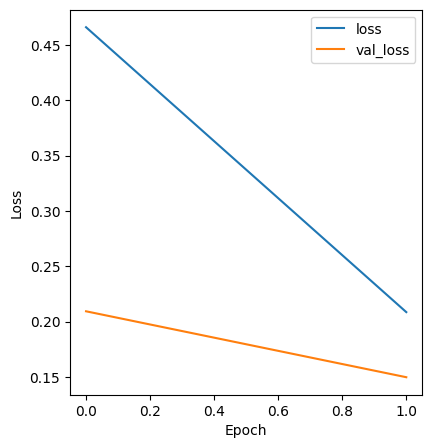

In [ ]:
metrics = history.history
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.epoch, metrics['loss'], metrics['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')

Text(0, 0.5, 'Accuracy')

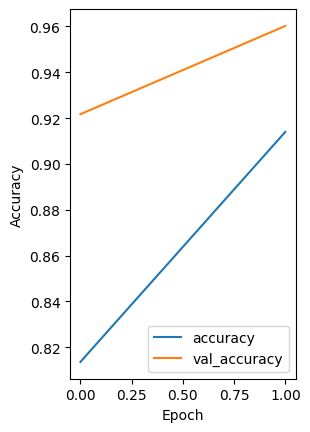

In [ ]:
#Display the accuracy metric
plt.subplot(1, 2, 2)
plt.plot(history.epoch, metrics['accuracy'], metrics['val_accuracy'])
plt.legend(['accuracy', 'val_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

LSTM MODEL

In [ ]:
model = Sequential(name="LSTM_Model")
model.add(Embedding(len(tokenizer.word_index)+1,
                    max_words,
                    input_length=max_words))

# adding a LSTM layer
model.add(LSTM(150, return_sequences=False))
model.add(BatchNormalization())  # Correct placement
model.add(Dropout(0.5))

# adding a dense layer with activation function of relu
model.add(Dense(50, activation='relu'))
model.add(BatchNormalization())  # Correct placement
model.add(Dropout(0.5))

# adding the final output activation with activation function of softmax
model.add(Dense(5, activation='softmax'))

# printing model summary
print(model.summary())


Model: "LSTM_Model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_5 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ ?                           │     0 (unbuilt) │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ ?                           │     0 (unbuilt) │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

None


In [ ]:
#Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [ ]:
model.fit(X_padded, y, epochs=5, batch_size=64, validation_split=0.2)

Epoch 1/5
99/99 ━━━━━━━━━━━━━━━━━━━━ 35s 312ms/step - accuracy: 0.3588 - loss: 1.9928 - val_accuracy: 0.7569 - val_loss: 0.9515
Epoch 2/5
99/99 ━━━━━━━━━━━━━━━━━━━━ 40s 305ms/step - accuracy: 0.8441 - loss: 0.7322 - val_accuracy: 0.7551 - val_loss: 0.7786
Epoch 3/5
99/99 ━━━━━━━━━━━━━━━━━━━━ 41s 306ms/step - accuracy: 0.9144 - loss: 0.3981 - val_accuracy: 0.7582 - val_loss: 0.7189
Epoch 4/5
99/99 ━━━━━━━━━━━━━━━━━━━━ 46s 361ms/step - accuracy: 0.9412 - loss: 0.2640 - val_accuracy: 0.7551 - val_loss: 0.8872
Epoch 5/5
99/99 ━━━━━━━━━━━━━━━━━━━━ 37s 324ms/step - accuracy: 0.9502 - loss: 0.2187 - val_accuracy: 0.8510 - val_loss: 0.4464


In [ ]:
#Display the accuracy
loss,accuracy = model.evaluate(X_padded, y)
print(f"Test Accuracy: {accuracy}")

248/248 ━━━━━━━━━━━━━━━━━━━━ 20s 80ms/step - accuracy: 0.9567 - loss: 0.1442
Test Accuracy: 0.9369949698448181


GRU Model

In [129]:
model = Sequential()

# Adding an Embedding layer
model.add(Embedding(len(tokenizer.word_index) + 1,
                    max_words,
                    input_length=max_words))

# Adding a GRU layer instead of LSTM
model.add(GRU(150, return_sequences=False))
model.add(BatchNormalization())
model.add(Dropout(0.5))

# Adding a Dense layer with 'relu' activation
model.add(Dense(50, activation='relu'))
model.add(BatchNormalization())  # Correct placement for batch normalization
model.add(Dropout(0.5))

# Adding the output layer with 'softmax' activation for multi-class classification
model.add(Dense(5, activation='softmax'))

# Printing the model summary
print(model.summary())

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_7 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru (GRU)                            │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ ?                           │     0 (unbuilt) │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ ?                           │     0 (unbuilt) │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

None


In [130]:
#Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [131]:
model.fit(X_padded, y, epochs=5, batch_size=64, validation_split=0.2)

Epoch 1/5
99/99 ━━━━━━━━━━━━━━━━━━━━ 41s 361ms/step - accuracy: 0.3969 - loss: 1.8979 - val_accuracy: 0.7519 - val_loss: 0.8603
Epoch 2/5
99/99 ━━━━━━━━━━━━━━━━━━━━ 40s 348ms/step - accuracy: 0.8579 - loss: 0.6608 - val_accuracy: 0.7519 - val_loss: 0.8971
Epoch 3/5
99/99 ━━━━━━━━━━━━━━━━━━━━ 32s 328ms/step - accuracy: 0.9370 - loss: 0.3475 - val_accuracy: 0.7532 - val_loss: 1.0015
Epoch 4/5
99/99 ━━━━━━━━━━━━━━━━━━━━ 41s 324ms/step - accuracy: 0.9474 - loss: 0.2610 - val_accuracy: 0.8043 - val_loss: 0.5294
Epoch 5/5
99/99 ━━━━━━━━━━━━━━━━━━━━ 42s 334ms/step - accuracy: 0.9617 - loss: 0.1846 - val_accuracy: 0.8125 - val_loss: 0.6292


In [132]:
#Display the accuracy
loss,accuracy = model.evaluate(X_padded, y)
print(f"Test Accuracy: {accuracy}")

248/248 ━━━━━━━━━━━━━━━━━━━━ 15s 62ms/step - accuracy: 0.8726 - loss: 0.3205
Test Accuracy: 0.8585858345031738
